<a href="https://colab.research.google.com/github/jurgis-vilums/fake-reviews/blob/master/fake_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Number of responses to generate
num_responses = 100

# Possible answers
roles = [
    "Cosmetology specialist", "Massage professional", "Cosmetics brand owner",
    "Beauty studio manager/administrator", "Individual consumer", "Other, please specify"
]
brands = ["Brand A", "Brand B", "Brand C", "Brand D", "Brand E"]
discovery_methods = [
    "At an exhibition", "At educational courses", "From colleagues", "At your workplace",
    "From clients", "From a family member", "Through an internet search",
    "Via an internet advertisement", "Via a social media advertisement",
    "Through an email newsletter", "Word of mouth", "Shelf or poster ad at the shop",
    "Friends", "School/college", "Other, please specify"
]
marketing_channels = [
    "Email", "Instagram", "Linkedin", "TikTok", "Visiting the website",
    "Phone calls to the sales manager", "Visits to a physical store",
    "Through colleagues/bosses", "I do not follow any"
]
stop_causes = [
    "Products becoming widely available in shops", "Reduced support from sales manager",
    "Absence of new product lines", "New product lines lacking a unique sales proposition",
    "Lack of educational seminars supporting new products",
    "Brand not recognized or preferred by clients", "Dissatisfaction with products among clients",
    "Product-based procedures becoming less profitable",
    "Moving to another country where the brand is unknown",
    "Ethical or financial scandals associated with the brand or personnel",
    "Slow or poor product delivery", "Receiving spoiled or damaged products"
]

In [43]:
def generate_responses(num):
    data = []
    for _ in range(num):
        role = random.choices(roles, weights=[1, 1, 1, 1, 4, 1])[0]
        brand = random.choices(brands, weights=[4, 1, 1, 1, 1])[0]
        years_using = max(0, min(30, int(random.gauss(6, 4))))
        discovery = random.choices(discovery_methods, weights=[1,2,3,4,5,14,5,6,12,8,5,10,4,14,3])[0]
        channels_followed = random.choices(marketing_channels, weights=[1, 1, 1, 1, 4, 1, 1, 1, 1], k=max(1, min(9, int(random.gauss(6, 4)))))
        personal_use = random.choices(["Yes", "No"], weights=[3, 1])[0]
        familiar_product_line = f"Product Line {random.randint(1, 5)}"
        causes_to_stop = random.choices(stop_causes, weights=[1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1], k=max(1, min(12, int(random.gauss(6, 4)))))
        issues_encountered = max(0, min(5, int(random.gauss(3, 1))))
        loyalty = max(0, min(10, int(random.gauss(7, 2))))
        online_store_usage = random.choices(["Yes", "No"], weights=[4, 1])[0]
        quarterly_spend = max(50, min(1000, int(random.gauss(300, 100))))
        row = {
            "Role in Cosmetics Industry": role,
            "Cosmetic Brand Used Most Frequently": brand,
            "Years Using Brand": years_using,
            "Learned About Brand": discovery,
            "Marketing Channels Followed": channels_followed, #work in progress
            "Personal Use at Home": personal_use,
            "Most Familiar Product Line": familiar_product_line, #work in progress
            "Potential Causes to Stop Using Brand": causes_to_stop, #work in progress
            "Issues Encountered": issues_encountered,
            "Loyalty": loyalty,
            "Use Online Store": online_store_usage,
            "Average Quarterly Spend": quarterly_spend
        }
        data.append(row)
    return data

In [27]:
def plot_data(df, plot_type):
    sns.set(style="whitegrid")

    # Define which plots should have rotated x-axis labels
    rotate_x_labels = {'Role in Cosmetics Industry', 'Learned About Brand'}

    if plot_type == "Potential Causes to Stop Using Brand" or plot_type == "Marketing Channels Followed":
      df = df.explode(plot_type)

    plot_functions = {
        'Years Using Brand': lambda ax: sns.histplot(df['Years Using Brand'], bins=15, kde=True, ax=ax),
        'Role in Cosmetics Industry': lambda ax: sns.countplot(x='Role in Cosmetics Industry', data=df, ax=ax),
        'Cosmetic Brand Used Most Frequently': lambda ax: sns.countplot(x='Cosmetic Brand Used Most Frequently', data=df, ax=ax),
        'Learned About Brand': lambda ax: sns.countplot(x='Learned About Brand', data=df, ax=ax),

        'Marketing Channels Followed': lambda ax: sns.countplot(x='Marketing Channels Followed', data=df, ax=ax),
        'Potential Causes to Stop Using Brand': lambda ax: sns.countplot(x='Potential Causes to Stop Using Brand', data=df, ax=ax),

        'Personal Use at Home': lambda ax: sns.countplot(x='Personal Use at Home', data=df, ax=ax),
        'Issues Encountered': lambda ax: sns.histplot(df['Issues Encountered'], bins=5, kde=True, ax=ax),
        'Loyalty': lambda ax: sns.histplot(df['Loyalty'], bins=10, kde=True, ax=ax),
        'Use Online Store': lambda ax: sns.countplot(x='Use Online Store', data=df, ax=ax),
        'Average Quarterly Spend': lambda ax: sns.histplot(df['Average Quarterly Spend'], bins=20, kde=True, ax=ax)
    }

    if plot_type in plot_functions:
        fig, ax = plt.subplots(figsize=(5, 7))  # Create a figure and an axes.
        plot_functions[plot_type](ax)  # Execute the plotting function with the axes
        plt.title(plot_type)
        ax.set_xlabel('')
        # Apply conditional rotation
        if plot_type in rotate_x_labels:
            plt.xticks(rotation=90, fontsize=8)
        else:
            plt.xticks(rotation=0, fontsize=8)

        plt.yticks(rotation=0, fontsize=8)
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.3, top=0.95)
        plt.show()
    else:
        print("Plot type", plot_type, "is not recognized.")

TypeError: unhashable type: 'list'

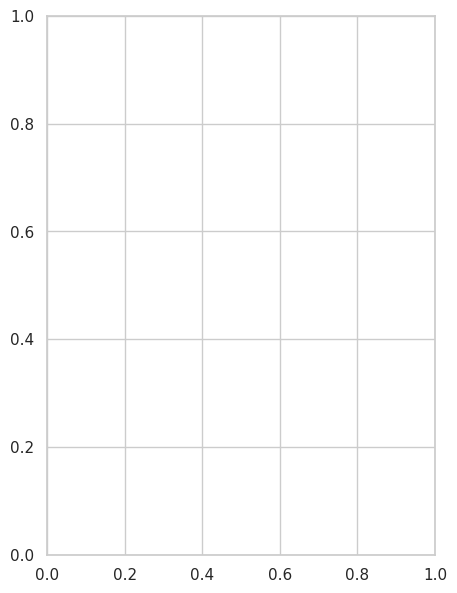

In [60]:
responses = generate_responses(num_responses)
df = pd.DataFrame(responses)
plot_data(df, 'Marketing Channels Followed')




TypeError: unhashable type: 'list'

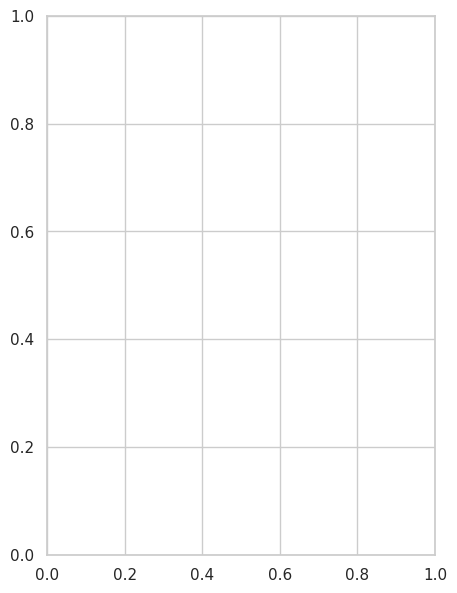

In [30]:
  # To plot only the 'Role in Cosmetics Industry'
# Continue plotting other data as needed
